In [14]:
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import math
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
import math

from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

filepath = '/Users/eshwarchandrasekharan/Desktop/repo/predict-pop/models-links/'
train_df = pd.read_csv(filepath + 'radshift-links-previous-to-next-page-info.csv')

one_hour_features = [
       'consumptions_by_type__link_clicks',
       'consumptions_by_type__other_clicks',
       'reactions_like_total',
       'stories_by_action_type__comment',
       'stories_by_action_type__like',
       'stories_by_action_type__share', 
        'engaged_fan',
       'fan_reach', 
    'impressions',
       'impressions_fan',
                ]

two_day_features = [
       'twoday_consumptions_by_type__link_clicks',
       'twoday_stories_by_action_type__share',
]

all_pages = train_df['page'].unique()
cross_promotion_features = all_pages

# train_features = one_hour_features
# print("ONLY 1 HOUR PERFORMANCE IN PREVIOUS PAGE")
# print('SHARES:')
# res = ols(y = train_df['next_shares'], x = train_df[train_features])
# print(res)
# print('CLICKS:')
# res = ols(y = train_df['next_clicks'], x = train_df[train_features])
# print(res)
# train_features = one_hour_features + page_infos# + cross_promotion_features
# for feat in cross_promotion_features:
#     train_features.append(feat)
# train_features

In [86]:
# from sklearn import linear_model
# clf = linear_model.LinearRegression()
# print("LINEAR REGRESSION!")

from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth = 10)
print("TREE REGRESSION!")

# train_df = pd.read_csv('radshift-links-previous-to-next-page-info.csv')
# all_pages = list(train_df.page.unique())

print("Performance stats with page names, and also cross-promotion order included!")
# print("WITH cross-promotion features")

page_infos = ['page', 'next_page']

# train_features = one_hour_features
# train_features = one_hour_features + page_infos + cross_promotion_features
train_features = one_hour_features + page_infos
# train_features = cross_promotion_features + one_hour_features

log_scale = 1
# log_scale = 0

if log_scale == 1:
    for feat in one_hour_features:
        train_df[feat] = np.log(train_df[feat] + 1)

# cross_promote = 0
cross_promote = 1

if cross_promote == 1:
    for feat in cross_promotion_features:
        train_features.append(feat)
        
# train_features = two_day_features + one_hour_features + cross_promotion_features

# for feats in (one_hour_features):
#     train_df[feats] = np.log(train_df[feats] + 1)

# lm = linear_model.LinearRegression(fit_intercept=True, normalize=True)
cv = 10

train_df['clicks_bucket'] = np.log(train_df['next_clicks'] + 1)
train_df['share_bucket'] = np.log(train_df['next_shares']+1)
# train_df['clicks_bucket'] = np.log(train_df['next_clicks'] + 1).astype(int)
# train_df['share_bucket'] = np.log(train_df['next_shares']+1).astype(int)

print("No. of data-points = ", len(train_df))

if log_scale == 0:
    print("Raw values!")
    y_clicks = train_df['next_clicks']
    y_share = train_df['next_shares']
else:
    print("Log scaled!")
    y_clicks = train_df['clicks_bucket']
    y_share = train_df['share_bucket']

###generate DFs for analysis - X and Y
X = train_df[train_features]
####convert page_infos into dummies
X = pd.get_dummies(data = X, columns=['page', 'next_page'])

from sklearn.model_selection import KFold

fold = 0
cv_folds = 10
kf = KFold(n_splits = cv_folds, shuffle = True)

clicks_accuracy = []
clicks_error = []
shares_accuracy = []
shares_error = []

share_cv_y_test = []
share_cv_y_pred = []
clicks_cv_y_test = []
clicks_cv_y_pred = []

for train_index, test_index in kf.split(X):
#     print("Fold = ", fold)
#     print("Shares: Fold = ", fold)
    y = y_share
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    ####
    for pt in y_test:
        share_cv_y_test.append(pt)
    for pt in y_pred:
        share_cv_y_pred.append(pt)
        
    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    shares_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    shares_error.append(error_percent)
    
#     print("Clicks: Fold = ", fold)
    y = y_clicks
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    
    ####
    for pt in y_test:
        clicks_cv_y_test.append(pt)
    for pt in y_pred:
        clicks_cv_y_pred.append(pt)

    accuracy = metrics.r2_score(y_test, y_pred)
#     print("Cross-Predicted Accuracy (R2):", accuracy)
    clicks_accuracy.append(accuracy)
    from sklearn.metrics import mean_absolute_error
    # print("Mean Absolute Error: ", mean_absolute_error(y, predictions))
    error_percent = mean_absolute_error(y_test, y_pred)/y.mean()
#     print("Mean values (share): ", y_test.mean(), " | percent error: ",  error_percent)
    clicks_error.append(error_percent)
    fold += 1
print("Shares performance: Accuracy = ", np.mean(shares_accuracy), " ; Error (/100) = ", np.mean(shares_error))
print("Clicks performance: Accuracy = ", np.mean(clicks_accuracy), " ; Error (/100) = ", np.mean(clicks_error))

TREE REGRESSION!
Performance stats with page names, and also cross-promotion order included!
No. of data-points =  38769
Log scaled!
Shares performance: Accuracy =  0.6575787588  ; Error (/100) =  0.212635134964
Clicks performance: Accuracy =  0.721635998508  ; Error (/100) =  0.0910451690249


R2:  0.779841664501
Error (\100):  0.516329728148
Mean:  118.348990173
Shares!
R2:  0.779658862269
Error (\100):  0.398451498565
Mean:  10139.2730016
Clicks!


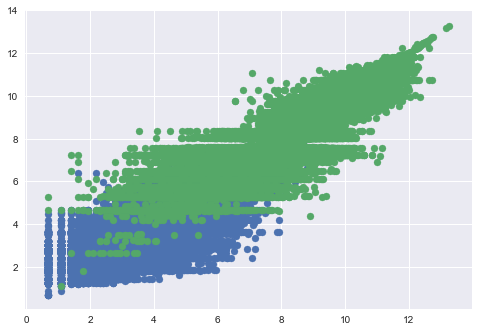

In [84]:
##share
# share_cv_y_test
# share_cv_y_pred

# accuracy = metrics.r2_score(share_cv_y_test, share_cv_y_pred)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(share_cv_y_test, share_cv_y_pred)/np.mean(share_cv_y_test)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(share_cv_y_test))
########
accuracy = metrics.r2_score(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)
print("R2: ", accuracy)
error_percent = mean_absolute_error(np.exp(share_cv_y_test)-1, np.exp(share_cv_y_pred)-1)/np.mean(np.exp(share_cv_y_test)-1)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(np.exp(share_cv_y_test)-1))
print('Shares!')
plt.scatter(share_cv_y_test, share_cv_y_pred)

# accuracy = metrics.r2_score(clicks_cv_y_test, clicks_cv_y_pred)
# print("R2: ", accuracy)
# error_percent = mean_absolute_error(clicks_cv_y_test, clicks_cv_y_pred)/np.mean(clicks_cv_y_test)
# print("Error (\\100): ", error_percent)
# print("Mean: ", np.mean(clicks_cv_y_test))
########
accuracy = metrics.r2_score(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)
print("R2: ", accuracy)
error_percent = mean_absolute_error(np.exp(clicks_cv_y_test)-1, np.exp(clicks_cv_y_pred)-1)/np.mean(np.exp(clicks_cv_y_test)-1)
print("Error (\\100): ", error_percent)
print("Mean: ", np.mean(np.exp(clicks_cv_y_test)-1))

print('Clicks!')
plt.scatter(clicks_cv_y_test, clicks_cv_y_pred)

In [ ]:
Task 3: Routing!
1) 
TREE REGRESSION!
Performance stats with page names, and also cross-promotion order included!
No. of data-points =  38769
Raw values!
Shares performance: Accuracy =  0.793776564986  ; Error (/100) =  0.564984135071
Clicks performance: Accuracy =  0.803486044908  ; Error (/100) =  0.420198927612
    
----
2)
TREE REGRESSION!
Performance stats with page names, and also cross-promotion order included!
No. of data-points =  38769
Log scaled!
Shares performance: Accuracy =  0.6575787588  ; Error (/100) =  0.212635134964
Clicks performance: Accuracy =  0.721635998508  ; Error (/100) =  0.0910451690249
    
2.1) Convert log-scale predictions/test to exponents and compute R2/errors

Shares!
R2:  0.779841664501
Error (\100):  0.516329728148
Mean:  118.348990173
Clicks!
R2:  0.779658862269
Error (\100):  0.398451498565
Mean:  10139.2730016
----